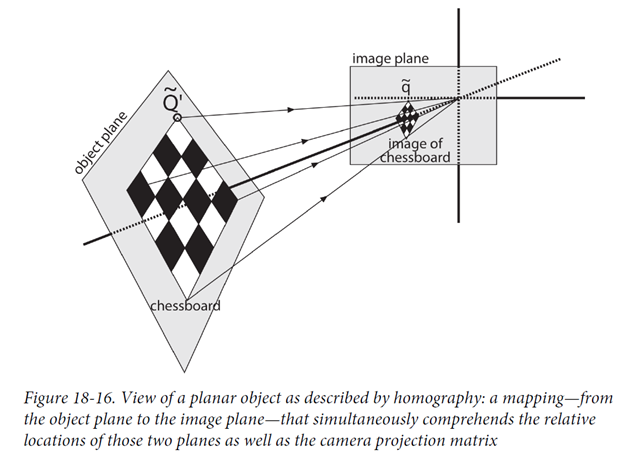

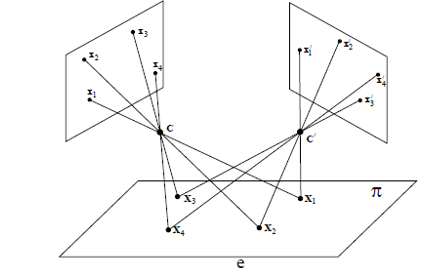

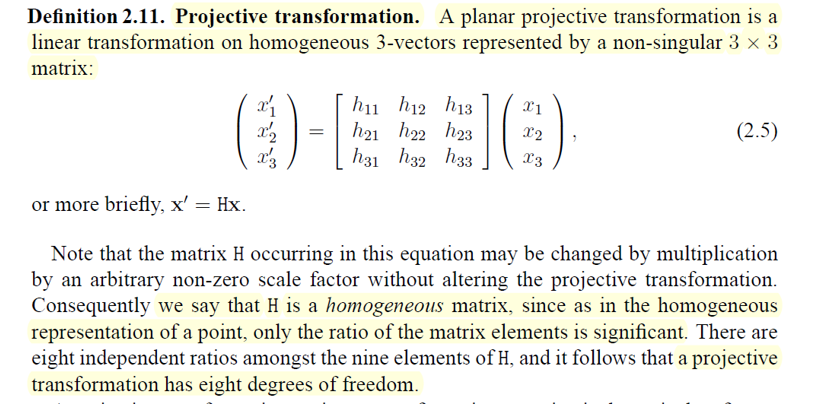

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

### Load chessboard img from two camera ###
## Left camera ##
imgL = cv2.imread(r'C:\Users\khan1\Desktop\Projective_transform\two_camera_homography\test_2\checkerboard\l.jpg')
## right camera ##
imgR = cv2.imread(r'C:\Users\khan1\Desktop\Projective_transform\two_camera_homography\test_2\checkerboard\r.jpg')

# plt.imshow(img1)
# plt.title("Camera 1 img")
# plt.show()

# plt.imshow(img2)
# plt.title("Camera 2 img")
# plt.show()

greyL = cv2.cvtColor(imgL, cv2.COLOR_BGR2GRAY)
greyR = cv2.cvtColor(imgR, cv2.COLOR_BGR2GRAY)
print(greyL.shape)

plt.imshow(cv2.cvtColor(greyL, cv2.COLOR_BGR2RGB),interpolation='nearest')
plt.title("Left: Camera 1 img")
plt.show()

plt.imshow(cv2.cvtColor(greyR, cv2.COLOR_BGR2RGB))
plt.title("Right: Camera 2 img")
plt.show()


### find corners for each img ###
retL, cornersL = cv2.findChessboardCorners(greyL, (7,7), None) # change (9,6) value based on  checkerboard image
retR, cornersR = cv2.findChessboardCorners(greyR, (7,7), None)

# print("img 1 corners")
#print(ret1, corners1)
# print("img 2 corners")
# print(ret2, corners2)


### Estimate homography ###
H, status = cv2.findHomography(cornersL, cornersR)
print("Homography matrix between camera 1 and 2, H: ")
print(H)


# [warp-chessboard]
imgL_warp = cv2.warpPerspective(imgL, H, (imgL.shape[1], imgL.shape[0]))
# [warp-chessboard]
plt.imshow(imgL_warp)
plt.title("Transformed img 1")
plt.show()



img_draw_warp = cv2.hconcat([imgL_warp,imgR])
plt.imshow(img_draw_warp)
plt.title("Desired chessboard view: wraped camera 1 view to camera 2 view")
plt.show()


### Show which points matched
cornersL = cornersL.tolist()
cornersL = [a[0] for a in cornersL]
#print(corners1)


#original points in img 2
cornersR = cornersR.tolist()
cornersR = [a[0] for a in cornersR]
# print("original points in img 2")
# print(corners2)

reproject_points = []
# [compute-transformed-corners]
img_draw_matches = cv2.hconcat([imgL, imgR])
for i in range(len(cornersL)):
    pt1 = np.array([cornersL[i][0], cornersL[i][1], 1])
    #print(pt1)
    pt1 = pt1.reshape(3, 1)
    pt2 = np.dot(H, pt1)
    pt2 = pt2/pt2[2]
    reproject_points.append(pt2)

    end = (int(imgL.shape[1] + pt2[0]), int(pt2[1]))
    COLORS = (np.random.randint(0,255), np.random.randint(0,255), np.random.randint(0,255))
    cv2.line(img_draw_matches, tuple([int(j) for j in cornersL[i]]), end, COLORS, 2)

# print(reproject_points)
plt.imshow(cv2.cvtColor(img_draw_matches, cv2.COLOR_BGR2RGB))
plt.title("Matched points")
plt.show()

(720, 1280)


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

Homography matrix between camera 1 and 2, H: 
[[ 9.29968576e-01 -8.34785721e-01  3.28368011e+02]
 [ 3.21580417e-01  9.89425377e-01 -3.15245367e+02]
 [-7.93435882e-05  5.73575359e-05  1.00000000e+00]]


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

#### Draw BB and plot

height 720 width 1280


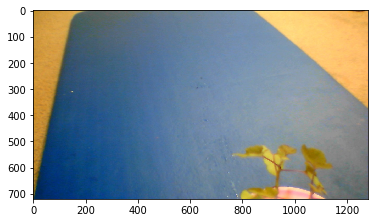

Left Camera BB ::


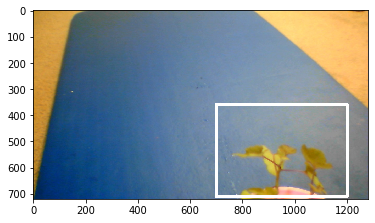

height 720 width 1280


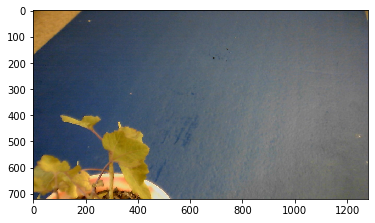

Right Camera BB ::


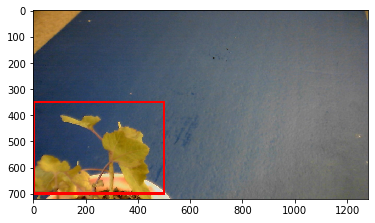

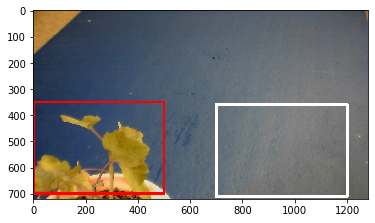

In [2]:
## Draw BB over weed img ###
#Load original image, in real case it will video frame
img_leftcam = cv2.imread(r'C:\Users\khan1\Desktop\Projective_transform\two_camera_homography\test_2\center\tooclose_left.jpg')
height = img_leftcam.shape[0]
width = img_leftcam.shape[1]
print("height",height,"width",width)
plt.imshow(cv2.cvtColor(img_leftcam, cv2.COLOR_BGR2RGB))
plt.show()

pix_x = 500
pix_y = 350

print("Left Camera BB ::")
clone_leftcam = img_leftcam.copy()
LstartX, LstartY = 700,360
LendX, LendY = LstartX+pix_x,LstartY+pix_y
cv2.rectangle(clone_leftcam, (LstartX, LstartY), (LendX, LendY),(255, 255, 255), 10)
plt.imshow(cv2.cvtColor(clone_leftcam, cv2.COLOR_BGR2RGB))
plt.show()


## Right cam 
img_rightcam = cv2.imread(r'C:\Users\khan1\Desktop\Projective_transform\two_camera_homography\test_2\center\tooclose_right.jpg')
height = img_rightcam.shape[0]
width = img_rightcam.shape[1]
print("height",height,"width",width)
plt.imshow(cv2.cvtColor(img_rightcam, cv2.COLOR_BGR2RGB))
plt.show()

print("Right Camera BB ::")
clone_rightcam = img_rightcam.copy()
RstartX, RstartY = 0,350
RendX, RendY = RstartX+pix_x, RstartY+pix_y
cv2.rectangle(clone_rightcam, (RstartX, RstartY), (RendX, RendY),(0, 0, 255), 10)
#cv2.rectangle(clone_rightcam, (LstartX, LstartY), (LendX, LendY),(255, 255, 255), 10)
plt.imshow(cv2.cvtColor(clone_rightcam, cv2.COLOR_BGR2RGB))
plt.show()

## plot 2 BB ##
copy_rightcam = clone_rightcam.copy()
cv2.rectangle(copy_rightcam, (LstartX, LstartY), (LendX, LendY),(255, 255, 255), 10)
plt.imshow(cv2.cvtColor(copy_rightcam, cv2.COLOR_BGR2RGB))
plt.show()

#### Transform Left Camera BB with corner point value and H matrix

In [3]:
H_cam = H

## For left image ##
print("BB points after projection")
print("multiply each WHITE (left cam) bb corner point with H matrix to get white bb corner points")
print("Top left:")
point_start = np.array([LstartX,LstartY,1])
new_point_start = np.matmul(H_cam,point_start)
new_point_start_norm_TL = np.around(new_point_start/new_point_start[2],decimals = 1)
print(new_point_start_norm_TL )

print("Top right:")
point_start = np.array([LstartX + pix_x,LstartY,1])
new_point_start = np.matmul(H_cam,point_start)
new_point_start_norm_TR = np.around(new_point_start/new_point_start[2], decimals = 1)
print(new_point_start_norm_TR )

print("Bottom left:")
point_start = np.array([LstartX,LstartY + pix_y,1])
new_point_start = np.matmul(H_cam,point_start)
new_point_start_norm_BL = np.around(new_point_start/new_point_start[2], decimals = 1)
print(new_point_start_norm_BL )

print("bottom right")
point_end = np.array([LstartX + pix_x,LstartY + pix_y,1])
new_point_end = np.matmul(H_cam,point_end)
new_point_end_norm_BR = np.around(new_point_end/new_point_end[2],decimals = 1)
print(new_point_end_norm_BR )

BB points after projection
multiply each WHITE (left cam) bb corner point with H matrix to get white bb corner points
Top left:
[703.4 275.7   1. ]
Top right:
[1.236e+03 4.612e+02 1.000e+00]
Bottom left:
[392.5 621.6   1. ]
bottom right
[900.7 817.7   1. ]


#### Plot the transformed BB for Left camera

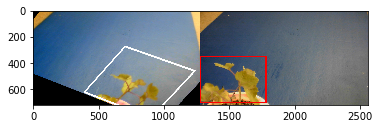

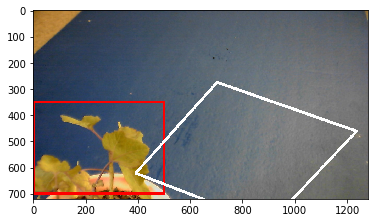

In [4]:
# [warp-camera-img]
leftcam_warp = cv2.warpPerspective(clone_leftcam, H_cam, (img_leftcam.shape[1], img_leftcam.shape[0]))
leftcam_warp = cv2.cvtColor(leftcam_warp, cv2.COLOR_BGR2RGB)
# plt.imshow(cv2.cvtColor(leftcam_warp, cv2.COLOR_BGR2RGB))
# plt.show()



img_draw_warp = cv2.hconcat([leftcam_warp,cv2.cvtColor(clone_rightcam, cv2.COLOR_BGR2RGB)])
plt.imshow(img_draw_warp)
#plt.title("Desired view: wraped camera 1 view to camera 2 view")
plt.show()

## plot proj BB ##
# print("How openCV draws BB based on projective point")
# copy_rightcam = clone_rightcam.copy()
# cv2.rectangle(copy_rightcam, (558, 193), (782, 801),(255, 255, 255), 10)
# plt.imshow(cv2.cvtColor(copy_rightcam, cv2.COLOR_BGR2RGB))
# plt.show()


## plot proj BB ##
copy_rightcam = clone_rightcam.copy()
pts = np.array([[new_point_start_norm_TL[0], new_point_start_norm_TL[1]],[new_point_start_norm_BL[0], new_point_start_norm_BL[1]],  #top left, bottom left
                [new_point_end_norm_BR[0], new_point_end_norm_BR[1]], [new_point_start_norm_TR[0], new_point_start_norm_TR[1]]], #bottom right, top right
               np.int32) 
  
pts = pts.reshape((-1, 1, 2)) 
isClosed = True
copy_rightcam = cv2.polylines(copy_rightcam, [pts],isClosed, (255, 255, 255), 10) 
plt.imshow(cv2.cvtColor(copy_rightcam, cv2.COLOR_BGR2RGB))
plt.show()

### IoU calculation

In [5]:
### IoU calculation using shapely linbrary ###
from shapely.geometry import Polygon

red_bb = Polygon([[RstartX,RstartY], [RstartX,RstartY + pix_y], [RstartX + pix_x,RstartY + pix_y], [RstartX + pix_x,RstartY]]) #Top left, bottom left, bottom right, top right

white_bb = Polygon([[LstartX,LstartY], [LstartX,LstartY + pix_y], [LstartX + pix_x,LstartY + pix_y], [LstartX + pix_x,LstartY]])

white_bb_transform = Polygon([[new_point_start_norm_TL[0], new_point_start_norm_TL[1]],[new_point_start_norm_BL[0], new_point_start_norm_BL[1]],  #top left, bottom left
                [new_point_end_norm_BR[0], new_point_end_norm_BR[1]], [new_point_start_norm_TR[0], new_point_start_norm_TR[1]]]) 

iou_before = red_bb.intersection(white_bb).area / red_bb.union(white_bb).area

print("IoU before transformation:")
print(iou_before)

iou_transform = red_bb.intersection(white_bb_transform).area / red_bb.union(white_bb_transform).area

print("IoU after transformation:")
print(iou_transform)

IoU before transformation:
0.0
IoU after transformation:
0.021078859582312003


In [6]:
### Alternatively Image with BB can be uploaded after BB is created from Detector ###
###  "C:\Users\khan1\Desktop\Projective_transform\classification_to_detect_only_correct_label.ipynb" ###


### Load weed image ###
## Left camera ##
# img1_weed = cv2.imread(r'C:\Users\khan1\Desktop\Projective_transform\two_camera_homography\weed_high\left_coc_close_BB.png')
# ## right camera ##
# img2_weed = cv2.imread(r'C:\Users\khan1\Desktop\Projective_transform\two_camera_homography\weed_high\right_coc_close_BB.png')

# plt.imshow(cv2.cvtColor(img1_weed, cv2.COLOR_BGR2RGB))
# plt.title("Left: Camera 1 img")
# plt.show()

# plt.imshow(cv2.cvtColor(img2_weed, cv2.COLOR_BGR2RGB))
# plt.title("Right: Camera 2 img")
# plt.show()
# print(img2_weed.shape)

# """Current size is different than orig size
# current 675X1200
# orig 720X1280
# Check if that affect when IOU calculated from BB corner points
# """

# ### Homography matrix is same from checkerboard image because camera position is same ###
# H_cam = H

# # [warp-camera-img]
# img1_weed_warp = cv2.warpPerspective(img1_weed, H_cam, (img1_weed.shape[1], img1_weed.shape[0]))
# img1_weed_warp = cv2.cvtColor(img1_weed_warp, cv2.COLOR_BGR2RGB)


# img_draw_warp = cv2.hconcat([img1_weed_warp,cv2.cvtColor(img2_weed, cv2.COLOR_BGR2RGB)])
# plt.imshow(img_draw_warp)
# plt.title("Desired view: wraped camera 1 view to camera 2 view")
# plt.show()


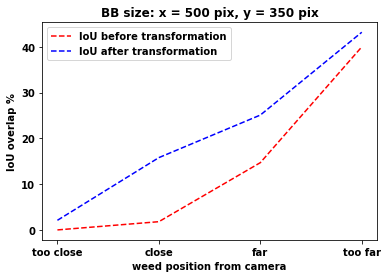

In [16]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"



names = ['too close', 'close', 'far', 'too far']
iou_before = [0, 1.8, 14.7, 40]
iou_transform = [2.1,15.8,25.1,43.2]
label = ["IoU before transformation","IoU after transformation"]

plt.plot(names,iou_before,'r--',label="IoU before transformation")
plt.plot(names,iou_transform,'b--',label="IoU after transformation")
plt.legend(label)
plt.title('BB size: x = 500 pix, y = 350 pix',fontweight="bold")
plt.xlabel('weed position from camera')
plt.ylabel('IoU overlap %')
plt.show()

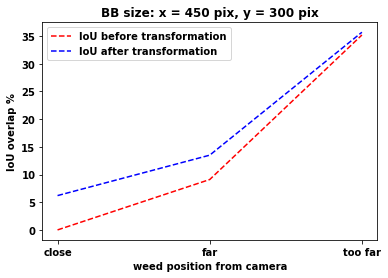

In [17]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"



names = ['close', 'far', 'too far']
iou_before = [0, 9.1, 35.2]
iou_transform = [6.2,13.5,35.7]
label = ["IoU before transformation","IoU after transformation"]

plt.plot(names,iou_before,'r--',label="IoU before transformation")
plt.plot(names,iou_transform,'b--',label="IoU after transformation")
plt.legend(label)
plt.title('BB size: x = 450 pix, y = 300 pix',fontweight="bold")
plt.xlabel('weed position from camera')
plt.ylabel('IoU overlap %')
plt.show()

### Error condition evaluation for Fuzzy fusion

#### (Scenario 1) Both BB at same y position but wrong x position

height 720 width 1280


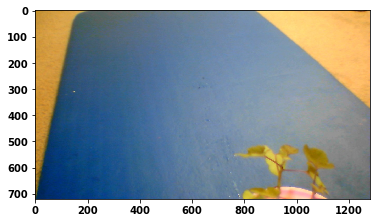

Left Camera BB ::


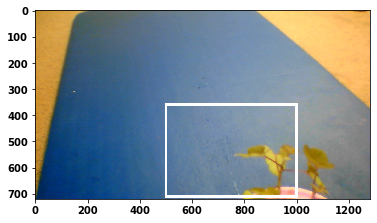

height 720 width 1280


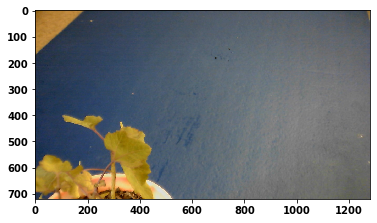

Right Camera BB ::


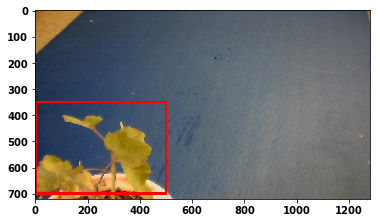

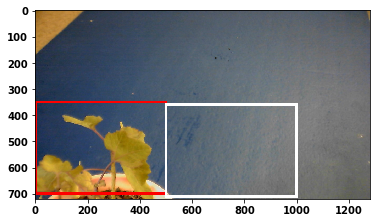

BB points after projection
multiply each WHITE (left cam) bb corner point with H matrix to get white bb corner points
Top left:
[502.4 205.7   1. ]
Top right:
[1.0175e+03 3.8510e+02 1.0000e+00]
Bottom left:
[200.4 547.5   1. ]
bottom right
[692.4 737.3   1. ]


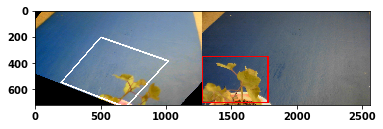

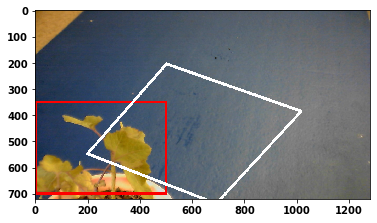

IoU before transformation:
0.0
IoU after transformation:
0.17008904482825313


In [15]:
## Draw BB over weed img ###
#Load original image, in real case it will video frame
img_leftcam = cv2.imread(r'C:\Users\khan1\Desktop\Projective_transform\two_camera_homography\test_2\center\tooclose_left.jpg')
height = img_leftcam.shape[0]
width = img_leftcam.shape[1]
print("height",height,"width",width)
plt.imshow(cv2.cvtColor(img_leftcam, cv2.COLOR_BGR2RGB))
plt.show()

pix_x = 500
pix_y = 350

print("Left Camera BB ::")
clone_leftcam = img_leftcam.copy()
LstartX, LstartY = 500,360
LendX, LendY = LstartX+pix_x,LstartY+pix_y
cv2.rectangle(clone_leftcam, (LstartX, LstartY), (LendX, LendY),(255, 255, 255), 10)
plt.imshow(cv2.cvtColor(clone_leftcam, cv2.COLOR_BGR2RGB))
plt.show()


## Right cam 
img_rightcam = cv2.imread(r'C:\Users\khan1\Desktop\Projective_transform\two_camera_homography\test_2\center\tooclose_right.jpg')
height = img_rightcam.shape[0]
width = img_rightcam.shape[1]
print("height",height,"width",width)
plt.imshow(cv2.cvtColor(img_rightcam, cv2.COLOR_BGR2RGB))
plt.show()

print("Right Camera BB ::")
clone_rightcam = img_rightcam.copy()
RstartX, RstartY = 0,350
RendX, RendY = RstartX+pix_x, RstartY+pix_y
cv2.rectangle(clone_rightcam, (RstartX, RstartY), (RendX, RendY),(0, 0, 255), 10)
#cv2.rectangle(clone_rightcam, (LstartX, LstartY), (LendX, LendY),(255, 255, 255), 10)
plt.imshow(cv2.cvtColor(clone_rightcam, cv2.COLOR_BGR2RGB))
plt.show()

## plot 2 BB ##
copy_rightcam = clone_rightcam.copy()
cv2.rectangle(copy_rightcam, (LstartX, LstartY), (LendX, LendY),(255, 255, 255), 10)
plt.imshow(cv2.cvtColor(copy_rightcam, cv2.COLOR_BGR2RGB))
plt.show()

H_cam = H

## For left image ##
print("BB points after projection")
print("multiply each WHITE (left cam) bb corner point with H matrix to get white bb corner points")
print("Top left:")
point_start = np.array([LstartX,LstartY,1])
new_point_start = np.matmul(H_cam,point_start)
new_point_start_norm_TL = np.around(new_point_start/new_point_start[2],decimals = 1)
print(new_point_start_norm_TL )

print("Top right:")
point_start = np.array([LstartX + pix_x,LstartY,1])
new_point_start = np.matmul(H_cam,point_start)
new_point_start_norm_TR = np.around(new_point_start/new_point_start[2], decimals = 1)
print(new_point_start_norm_TR )

print("Bottom left:")
point_start = np.array([LstartX,LstartY + pix_y,1])
new_point_start = np.matmul(H_cam,point_start)
new_point_start_norm_BL = np.around(new_point_start/new_point_start[2], decimals = 1)
print(new_point_start_norm_BL )

print("bottom right")
point_end = np.array([LstartX + pix_x,LstartY + pix_y,1])
new_point_end = np.matmul(H_cam,point_end)
new_point_end_norm_BR = np.around(new_point_end/new_point_end[2],decimals = 1)
print(new_point_end_norm_BR )


# [warp-camera-img]
leftcam_warp = cv2.warpPerspective(clone_leftcam, H_cam, (img_leftcam.shape[1], img_leftcam.shape[0]))
leftcam_warp = cv2.cvtColor(leftcam_warp, cv2.COLOR_BGR2RGB)
# plt.imshow(cv2.cvtColor(leftcam_warp, cv2.COLOR_BGR2RGB))
# plt.show()



img_draw_warp = cv2.hconcat([leftcam_warp,cv2.cvtColor(clone_rightcam, cv2.COLOR_BGR2RGB)])
plt.imshow(img_draw_warp)
#plt.title("Desired view: wraped camera 1 view to camera 2 view")
plt.show()

## plot proj BB ##
# print("How openCV draws BB based on projective point")
# copy_rightcam = clone_rightcam.copy()
# cv2.rectangle(copy_rightcam, (558, 193), (782, 801),(255, 255, 255), 10)
# plt.imshow(cv2.cvtColor(copy_rightcam, cv2.COLOR_BGR2RGB))
# plt.show()


## plot proj BB ##
copy_rightcam = clone_rightcam.copy()
pts = np.array([[new_point_start_norm_TL[0], new_point_start_norm_TL[1]],[new_point_start_norm_BL[0], new_point_start_norm_BL[1]],  #top left, bottom left
                [new_point_end_norm_BR[0], new_point_end_norm_BR[1]], [new_point_start_norm_TR[0], new_point_start_norm_TR[1]]], #bottom right, top right
               np.int32) 
  
pts = pts.reshape((-1, 1, 2)) 
isClosed = True
copy_rightcam = cv2.polylines(copy_rightcam, [pts],isClosed, (255, 255, 255), 10) 
plt.imshow(cv2.cvtColor(copy_rightcam, cv2.COLOR_BGR2RGB))
plt.show()


### IoU calculation using shapely linbrary ###
from shapely.geometry import Polygon

red_bb = Polygon([[RstartX,RstartY], [RstartX,RstartY + pix_y], [RstartX + pix_x,RstartY + pix_y], [RstartX + pix_x,RstartY]]) #Top left, bottom left, bottom right, top right

white_bb = Polygon([[LstartX,LstartY], [LstartX,LstartY + pix_y], [LstartX + pix_x,LstartY + pix_y], [LstartX + pix_x,LstartY]])

white_bb_transform = Polygon([[new_point_start_norm_TL[0], new_point_start_norm_TL[1]],[new_point_start_norm_BL[0], new_point_start_norm_BL[1]],  #top left, bottom left
                [new_point_end_norm_BR[0], new_point_end_norm_BR[1]], [new_point_start_norm_TR[0], new_point_start_norm_TR[1]]]) 

iou_before = red_bb.intersection(white_bb).area / red_bb.union(white_bb).area

print("IoU before transformation:")
print(iou_before)

iou_transform = red_bb.intersection(white_bb_transform).area / red_bb.union(white_bb_transform).area

print("IoU after transformation:")
print(iou_transform)

#### (Scenario 2) BB at two different y position

height 720 width 1280


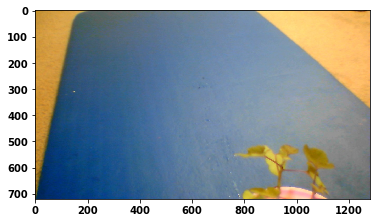

Left Camera BB ::


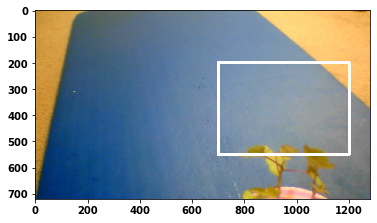

height 720 width 1280


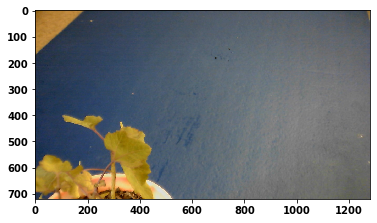

Right Camera BB ::


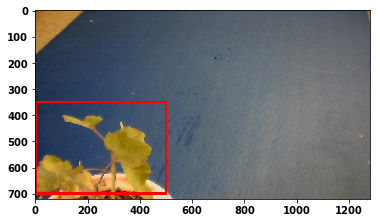

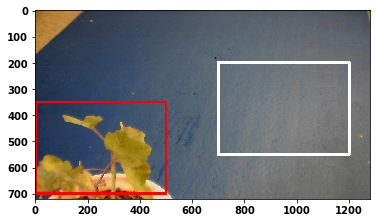

BB points after projection
multiply each WHITE (left cam) bb corner point with H matrix to get white bb corner points
Top left:
[849.8 112.7   1. ]
Top right:
[1.3941e+03 2.9310e+02 1.0000e+00]
Bottom left:
[533.  465.2   1. ]
bottom right
[1.0522e+03 6.5660e+02 1.0000e+00]


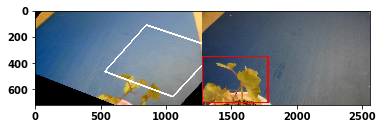

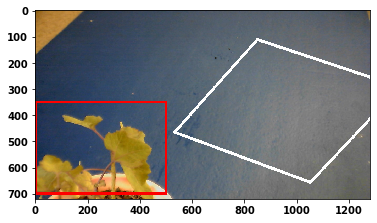

IoU before transformation:
0.0
IoU after transformation:
0.0


In [14]:
## Draw BB over weed img ###
#Load original image, in real case it will video frame
img_leftcam = cv2.imread(r'C:\Users\khan1\Desktop\Projective_transform\two_camera_homography\test_2\center\tooclose_left.jpg')
height = img_leftcam.shape[0]
width = img_leftcam.shape[1]
print("height",height,"width",width)
plt.imshow(cv2.cvtColor(img_leftcam, cv2.COLOR_BGR2RGB))
plt.show()

pix_x = 500
pix_y = 350

print("Left Camera BB ::")
clone_leftcam = img_leftcam.copy()
LstartX, LstartY = 700,200
LendX, LendY = LstartX+pix_x,LstartY+pix_y
cv2.rectangle(clone_leftcam, (LstartX, LstartY), (LendX, LendY),(255, 255, 255), 10)
plt.imshow(cv2.cvtColor(clone_leftcam, cv2.COLOR_BGR2RGB))
plt.show()


## Right cam 
img_rightcam = cv2.imread(r'C:\Users\khan1\Desktop\Projective_transform\two_camera_homography\test_2\center\tooclose_right.jpg')
height = img_rightcam.shape[0]
width = img_rightcam.shape[1]
print("height",height,"width",width)
plt.imshow(cv2.cvtColor(img_rightcam, cv2.COLOR_BGR2RGB))
plt.show()

print("Right Camera BB ::")
clone_rightcam = img_rightcam.copy()
RstartX, RstartY = 0,350
RendX, RendY = RstartX+pix_x, RstartY+pix_y
cv2.rectangle(clone_rightcam, (RstartX, RstartY), (RendX, RendY),(0, 0, 255), 10)
#cv2.rectangle(clone_rightcam, (LstartX, LstartY), (LendX, LendY),(255, 255, 255), 10)
plt.imshow(cv2.cvtColor(clone_rightcam, cv2.COLOR_BGR2RGB))
plt.show()

## plot 2 BB ##
copy_rightcam = clone_rightcam.copy()
cv2.rectangle(copy_rightcam, (LstartX, LstartY), (LendX, LendY),(255, 255, 255), 10)
plt.imshow(cv2.cvtColor(copy_rightcam, cv2.COLOR_BGR2RGB))
plt.show()

H_cam = H

## For left image ##
print("BB points after projection")
print("multiply each WHITE (left cam) bb corner point with H matrix to get white bb corner points")
print("Top left:")
point_start = np.array([LstartX,LstartY,1])
new_point_start = np.matmul(H_cam,point_start)
new_point_start_norm_TL = np.around(new_point_start/new_point_start[2],decimals = 1)
print(new_point_start_norm_TL )

print("Top right:")
point_start = np.array([LstartX + pix_x,LstartY,1])
new_point_start = np.matmul(H_cam,point_start)
new_point_start_norm_TR = np.around(new_point_start/new_point_start[2], decimals = 1)
print(new_point_start_norm_TR )

print("Bottom left:")
point_start = np.array([LstartX,LstartY + pix_y,1])
new_point_start = np.matmul(H_cam,point_start)
new_point_start_norm_BL = np.around(new_point_start/new_point_start[2], decimals = 1)
print(new_point_start_norm_BL )

print("bottom right")
point_end = np.array([LstartX + pix_x,LstartY + pix_y,1])
new_point_end = np.matmul(H_cam,point_end)
new_point_end_norm_BR = np.around(new_point_end/new_point_end[2],decimals = 1)
print(new_point_end_norm_BR )


# [warp-camera-img]
leftcam_warp = cv2.warpPerspective(clone_leftcam, H_cam, (img_leftcam.shape[1], img_leftcam.shape[0]))
leftcam_warp = cv2.cvtColor(leftcam_warp, cv2.COLOR_BGR2RGB)
# plt.imshow(cv2.cvtColor(leftcam_warp, cv2.COLOR_BGR2RGB))
# plt.show()



img_draw_warp = cv2.hconcat([leftcam_warp,cv2.cvtColor(clone_rightcam, cv2.COLOR_BGR2RGB)])
plt.imshow(img_draw_warp)
#plt.title("Desired view: wraped camera 1 view to camera 2 view")
plt.show()

## plot proj BB ##
# print("How openCV draws BB based on projective point")
# copy_rightcam = clone_rightcam.copy()
# cv2.rectangle(copy_rightcam, (558, 193), (782, 801),(255, 255, 255), 10)
# plt.imshow(cv2.cvtColor(copy_rightcam, cv2.COLOR_BGR2RGB))
# plt.show()


## plot proj BB ##
copy_rightcam = clone_rightcam.copy()
pts = np.array([[new_point_start_norm_TL[0], new_point_start_norm_TL[1]],[new_point_start_norm_BL[0], new_point_start_norm_BL[1]],  #top left, bottom left
                [new_point_end_norm_BR[0], new_point_end_norm_BR[1]], [new_point_start_norm_TR[0], new_point_start_norm_TR[1]]], #bottom right, top right
               np.int32) 
  
pts = pts.reshape((-1, 1, 2)) 
isClosed = True
copy_rightcam = cv2.polylines(copy_rightcam, [pts],isClosed, (255, 255, 255), 10) 
plt.imshow(cv2.cvtColor(copy_rightcam, cv2.COLOR_BGR2RGB))
plt.show()


### IoU calculation using shapely linbrary ###
from shapely.geometry import Polygon

red_bb = Polygon([[RstartX,RstartY], [RstartX,RstartY + pix_y], [RstartX + pix_x,RstartY + pix_y], [RstartX + pix_x,RstartY]]) #Top left, bottom left, bottom right, top right

white_bb = Polygon([[LstartX,LstartY], [LstartX,LstartY + pix_y], [LstartX + pix_x,LstartY + pix_y], [LstartX + pix_x,LstartY]])

white_bb_transform = Polygon([[new_point_start_norm_TL[0], new_point_start_norm_TL[1]],[new_point_start_norm_BL[0], new_point_start_norm_BL[1]],  #top left, bottom left
                [new_point_end_norm_BR[0], new_point_end_norm_BR[1]], [new_point_start_norm_TR[0], new_point_start_norm_TR[1]]]) 

iou_before = red_bb.intersection(white_bb).area / red_bb.union(white_bb).area

print("IoU before transformation:")
print(iou_before)

iou_transform = red_bb.intersection(white_bb_transform).area / red_bb.union(white_bb_transform).area

print("IoU after transformation:")
print(iou_transform)